## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study_complete = pd.merge(study_results, mouse_metadata, how= "outer", on= "Mouse ID")
mouse_study_complete

# Display the data table for preview
mouse_study_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [36]:
# Checking the number of mice.

len(mouse_study_complete['Mouse ID'].unique())



249

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = mouse_study_complete[mouse_study_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_rows = mouse_study_complete[mouse_study_complete.duplicated(['Mouse ID'], keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [95]:
mouse_study_complete.loc[mouse_study_complete["Mouse ID"]=="g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_complete.loc[mouse_study_complete["Mouse ID"]!="g989"]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [101]:
len(cleaned_df['Mouse ID'].unique())

248

In [107]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

means = cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = cleaned_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table = pd.DataFrame({"Mean Tumor Volume":means, 
                            "Median Tumor Volume":medians,
                            "Tumor Volume Variance":variances,
                            "Tumor Volume Std. Dev":sds,
                            "Tumor Volume Std. Err":sems})
summary_table


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_table = (cleaned_df.groupby(['Drug Regimen']).agg([('mean','mean'),('median','median'), ('var','var'), ('std','std'),('sem','sem')]))
summary_table['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

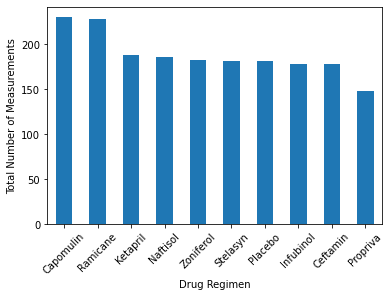

<Figure size 432x288 with 0 Axes>

In [104]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts = cleaned_df['Drug Regimen'].value_counts()
counts.plot(kind="bar", rot =45)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

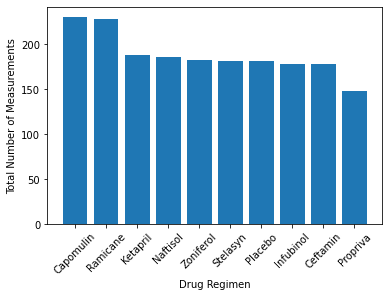

In [105]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
counts = cleaned_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Total Number of Measurements")
plt.show

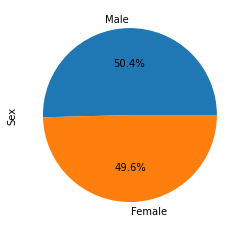

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = cleaned_df.drop_duplicates(subset=['Mouse ID'], keep='first')
counts = gender_df.Sex.value_counts()
counts
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

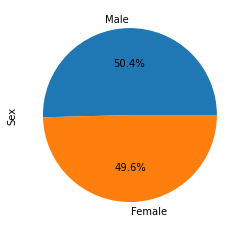

In [150]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_df = cleaned_df.drop_duplicates(subset=['Mouse ID'], keep='first')
counts = gender_df.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show


## Quartiles, Outliers and Boxplots

In [168]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cleaned_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
max_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(cleaned_df,on=['Mouse ID','Timepoint'], how="left" )
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [204]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)

    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq= quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = (final_tumor_vol.loc[(final_tumor_vol <= lower_bound) | (final_tumor_vol >= upper_bound)]).count()
    print(f"{drug}'s potential outliers: {outliers}")
    print(f"{drug}'s IQR is: {iqr}")

Capomulin's potential outliers: 0
Capomulin's IQR is: 7.781863460000004
Ramicane's potential outliers: 0
Ramicane's IQR is: 9.098536719999998
Infubinol's potential outliers: 1
Infubinol's IQR is: 11.477135160000003
Ceftamin's potential outliers: 0
Ceftamin's IQR is: 15.577752179999997


Text(0, 0.5, 'Final Tumor Volume (mm3)')

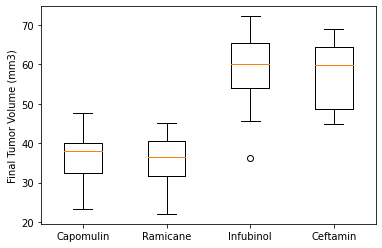

In [205]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor = 'red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   
5     b128         25           43.262145                 1    Capomulin   
6     b128         30           40.605335                 1    Capomulin   
7     b128         35           37.967644                 1    Capomulin   
8     b128         40           38.379726                 2    Capomulin   
9     b128         45           38.982878                 2    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female          

<function matplotlib.pyplot.show(close=None, block=None)>

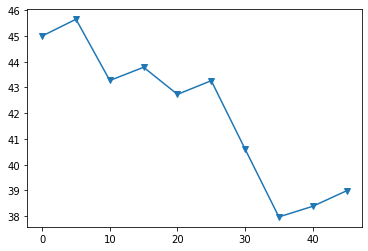

In [219]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'b128']
print(mousedata)

x_axis = mousedata["Timepoint"]
y_axis = mousedata["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, marker = "v")
plt.show

Text(0.5, 1.0, 'Avg Tumor Vol vs Avg Weight')

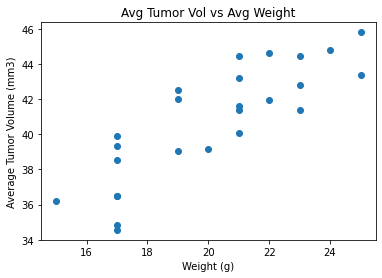

In [223]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Avg Tumor Vol vs Avg Weight")

## Correlation and Regression

In [177]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between mouse weight and the avg tumor vol is 0.84


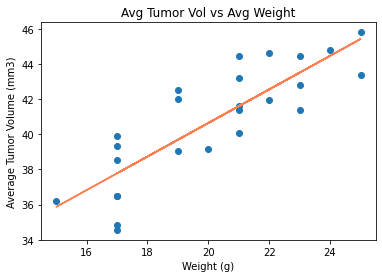

In [221]:
corr = round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the avg tumor vol is {corr}")
model = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], y_values, color = 'coral')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Avg Tumor Vol vs Avg Weight")
plt.show()